In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Specify dtype option on import or set low_memory=False.
pd.options.mode.chained_assignment = None  # default='warn'

import math
import scipy

# Datviz purposes
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import missingno as msno

In [45]:
try :
    train_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/train.csv", low_memory=False)
    test_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/test.csv", low_memory=False) # For Kaggle

except :
    train_data = pd.read_csv("../1-Preprocessing/train_data.csv", low_memory=False)
    test_data = pd.read_csv("../datasets/test.csv", low_memory=False) # For local development

# Missing Values

In [46]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (349002, 25)


In [47]:
# Drop row when more than 40% of the values are missing
train_data = train_data.dropna(thresh=train_data.shape[1] * 0.6, axis=0) 

In [48]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (337593, 25)


### 'technical_solution'

In [49]:
# Handle 'technical_solution_proposed' column
def reconstruction(x):
    if x == 'reconstruction':
        return 1
    else:
        return 0
def major_repair(x):
    if x == 'major repair':
        return 1
    else:
        return 0
def minor_repair(x):
    if x == 'minor repair':
        return 1
    else:
        return 0
def no_need(x):
    if x == 'no need':
        return 1
    else:
        return 0

train_data['reconstruction'] = train_data['technical_solution_proposed'].apply(reconstruction)
train_data['major_repair'] = train_data['technical_solution_proposed'].apply(major_repair)
train_data['minor_repair'] = train_data['technical_solution_proposed'].apply(minor_repair)
train_data['no_need'] = train_data['technical_solution_proposed'].apply(no_need)

train_data = train_data.drop(['technical_solution_proposed'], axis=1)

In [50]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
floors_before_eq(total),326560.0,NaN,NaN,NaN,2.083188,0.665017,1.0,2.0,2.0,2.0,9.0
old_building,337593.0,NaN,NaN,NaN,24.449023,65.457712,0.0,8.0,16.0,27.0,999.0
plinth_area(ft^2),289391.0,NaN,NaN,NaN,379.736771,172.723717,-1.0,269.0,350.0,458.0,1000.0
height_before_eq(ft),326560.0,NaN,NaN,NaN,16.085632,5.624452,6.0,12.0,16.0,18.0,99.0
land_surface_condition,335458,3,flat,275245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_foundation,337593,5,mixed,273380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_roof,289391,3,bamboo_or_timber_light,190650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_ground_floor,326560,5,clay_mud,261403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_other_floor,335458,4,wood_or_bambo_mud,208058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,332448.0,NaN,NaN,NaN,0.259544,0.529636,0.0,0.0,0.0,0.0,3.0


In [51]:
eda_for_missing_val = train_data.copy()

from sklearn.preprocessing import LabelEncoder
# Change object type to numerical using encoding
def encode_data(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    return data

eda_for_missing_val = encode_data(eda_for_missing_val)

In [52]:
cols = eda_for_missing_val.describe(include='all').transpose()
cols['mode'] = eda_for_missing_val.mode().iloc[0]
cols['median'] = eda_for_missing_val.median()

cols

,count,mean,std,min,25%,50%,75%,max,mode,median
floors_before_eq(total),326560.0,2.083188,0.665017,1.0,2.0,2.0,2.0,9.0,2.0,2.0
old_building,337593.0,24.449023,65.457712,0.0,8.0,16.0,27.0,999.0,15.0,16.0
plinth_area(ft^2),289391.0,379.736771,172.723717,-1.0,269.0,350.0,458.0,1000.0,300.0,350.0
height_before_eq(ft),326560.0,16.085632,5.624452,6.0,12.0,16.0,18.0,99.0,18.0,16.0
land_surface_condition,337593.0,0.260838,0.644158,0.0,0.0,0.0,0.0,3.0,0.0,0.0
type_of_foundation,337593.0,1.878164,0.747457,0.0,2.0,2.0,2.0,4.0,2.0,2.0
type_of_roof,337593.0,1.004831,0.767972,0.0,1.0,1.0,1.0,3.0,1.0,1.0
type_of_ground_floor,337593.0,1.263225,1.011238,0.0,1.0,1.0,1.0,5.0,1.0,1.0
type_of_other_floor,337593.0,2.776518,0.934797,0.0,3.0,3.0,3.0,4.0,3.0,3.0
position,332448.0,0.259544,0.529636,0.0,0.0,0.0,0.0,3.0,0.0,0.0


### imputer using simple imputer

In [53]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df['skewness'] = eda_for_missing_val.skew()
df['kurtosis'] = eda_for_missing_val.kurtosis()
df

Missing values in each column: 




,Missing values,percentage,skewness,kurtosis
floors_before_eq(total),11033,3.27,0.441579,1.618845
old_building,0,0.00,13.792996,201.979572
plinth_area(ft^2),48202,14.28,0.836919,1.229529
height_before_eq(ft),11033,3.27,2.531782,25.752144
land_surface_condition,2135,0.63,2.971727,9.022789
type_of_foundation,0,0.00,-0.320550,3.380721
type_of_roof,48202,14.28,0.674173,0.455531
type_of_ground_floor,11033,3.27,2.033262,3.425043
type_of_other_floor,2135,0.63,-0.926988,0.137575
position,5145,1.52,2.017514,3.549612


<Axes: >

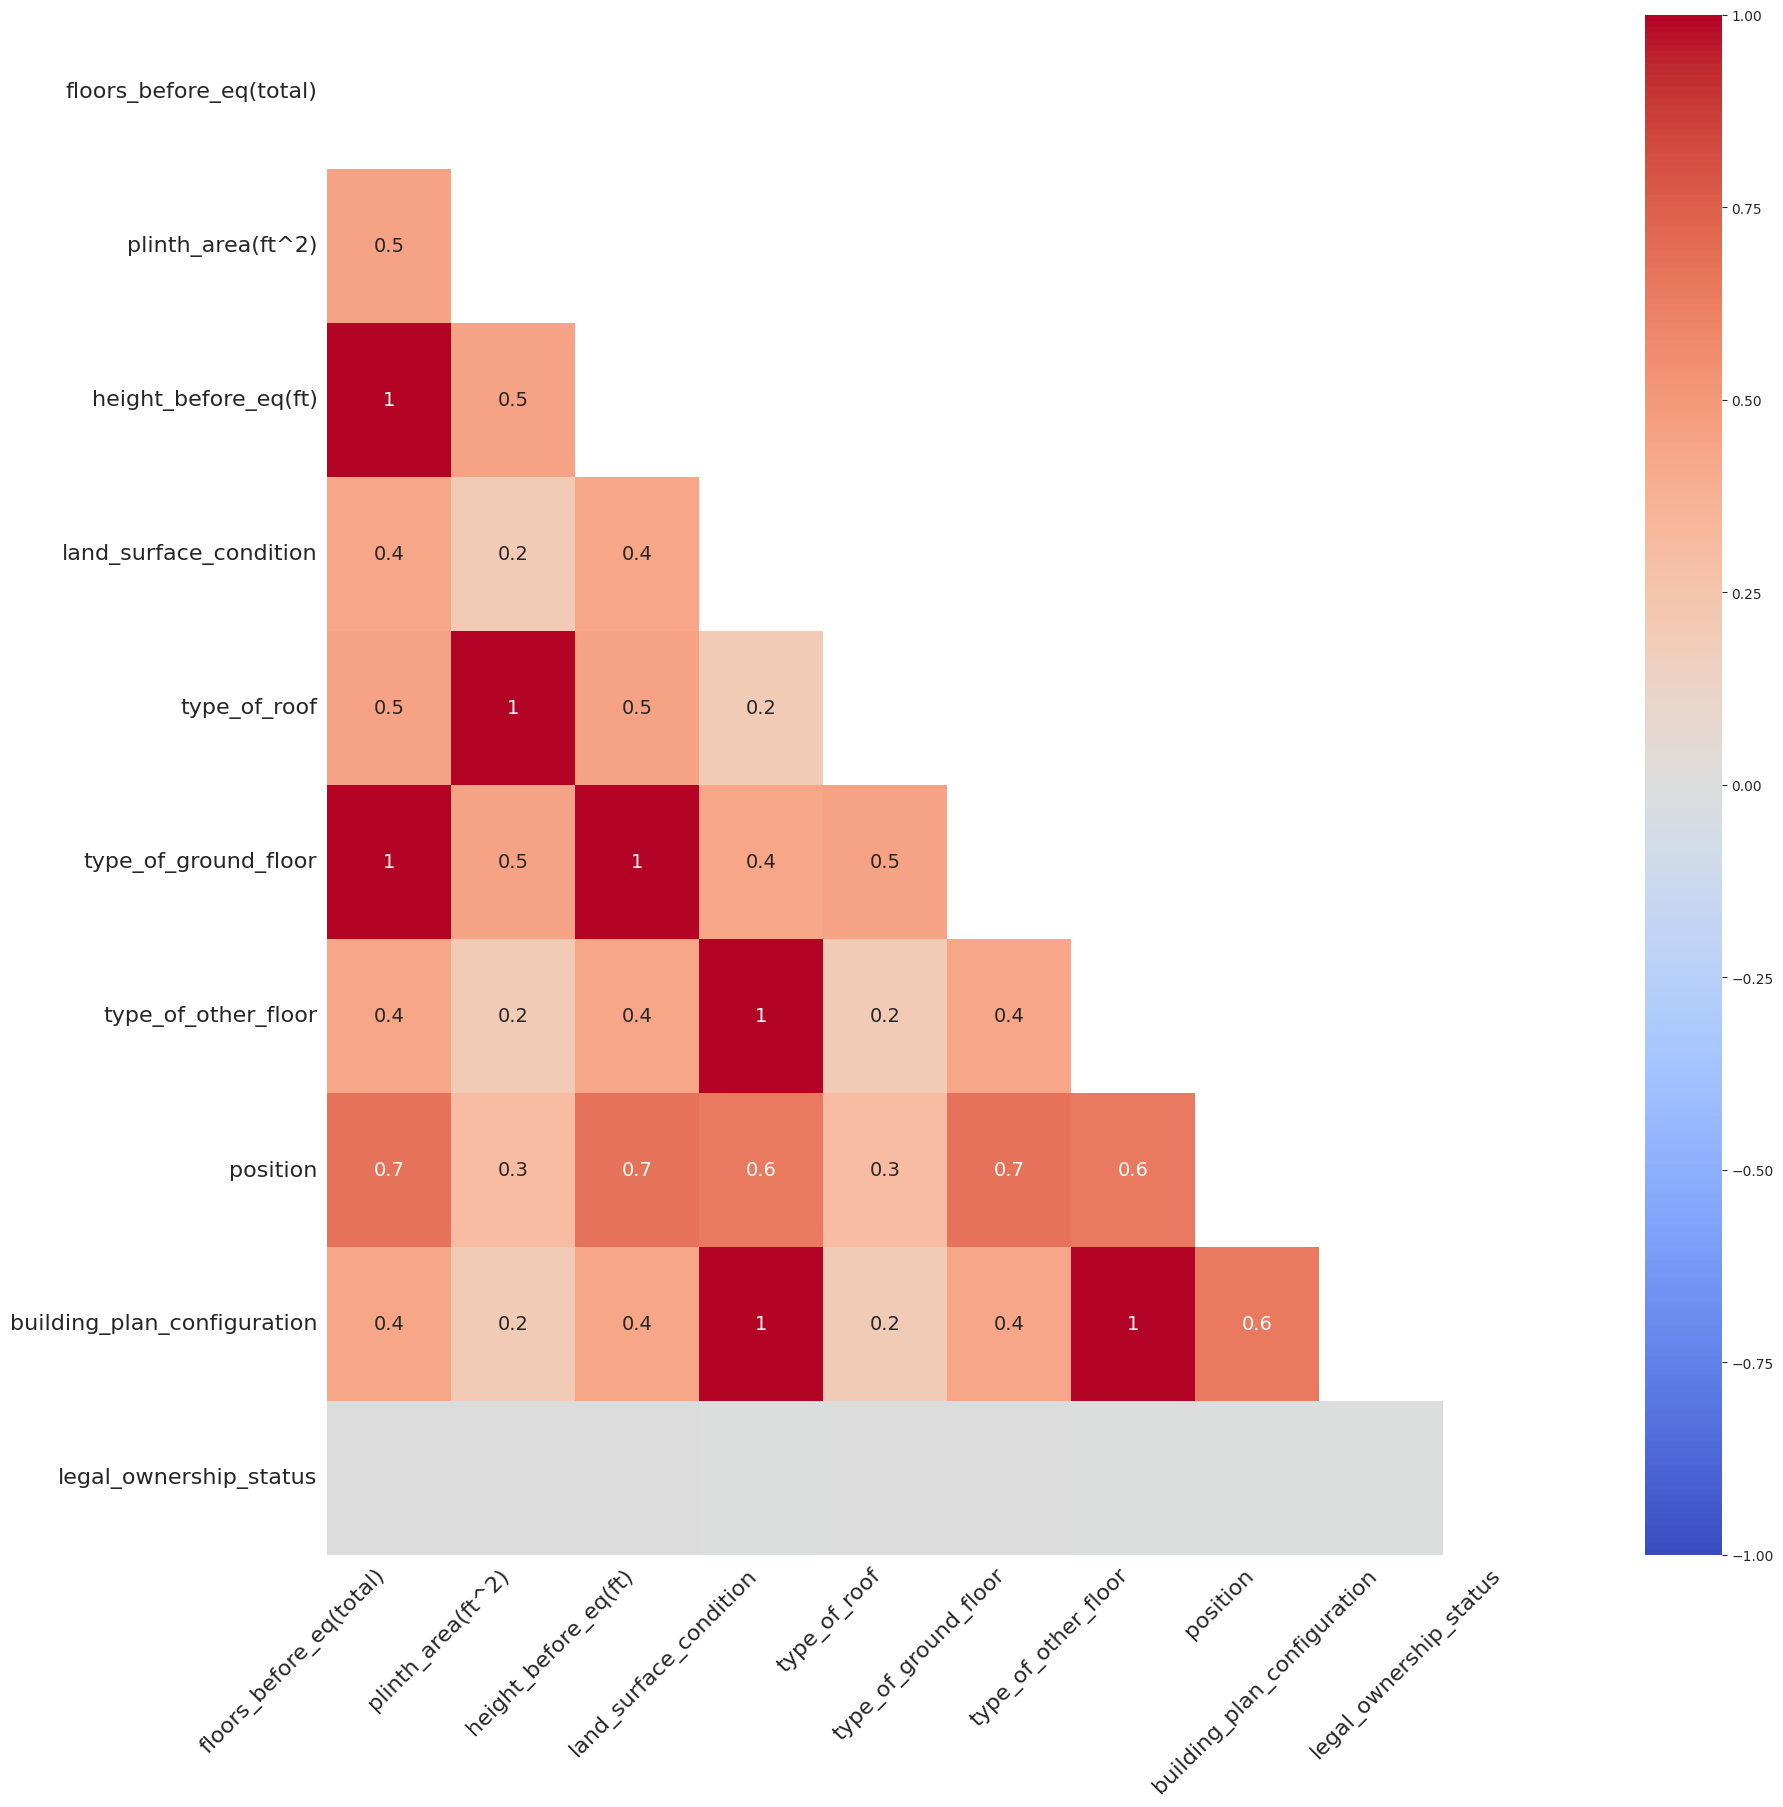

In [54]:
# plot correlation using mask and show the value in the cell using annot
msno.heatmap(train_data, figsize=(20, 20), cmap='coolwarm')

In [55]:
# impute floors_before_eq(total), plinth_area(ft^2), type_of_roof	 features with most_frequent values
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
train_data['floors_before_eq(total)'] = impute_mode.fit_transform(train_data[['floors_before_eq(total)']])
train_data['plinth_area(ft^2)'] = impute_mode.fit_transform(train_data[['plinth_area(ft^2)']])
train_data['type_of_roof'] = impute_mode.fit_transform(train_data[['type_of_roof']])

### imputer manual

In [56]:
# fill missing value with groupby mode
train_data['legal_ownership_status'].\
    fillna(train_data.groupby(['residential_type','public_place_type'])['legal_ownership_status']\
           .transform(lambda x: x.mode()[0]), inplace=True)

In [57]:
train_data['position'].\
    fillna(train_data.groupby(['building_plan_configuration'])['position']\
           .transform(lambda x: x.mode()[0]), inplace=True)

In [58]:
train_data['type_of_ground_floor'].\
    fillna(train_data.groupby(['land_surface_condition'])['type_of_ground_floor']\
           .transform(lambda x: x.mode()[0]), inplace=True)

In [59]:
train_data['height_before_eq(ft)'].\
    fillna(train_data.groupby(['floors_before_eq(total)'])['height_before_eq(ft)']\
           .transform(lambda x: x.mode()[0]), inplace=True)

In [60]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df['skewness'] = eda_for_missing_val.skew()
df['kurtosis'] = eda_for_missing_val.kurtosis()
df

Missing values in each column: 




,Missing values,percentage,skewness,kurtosis
floors_before_eq(total),0,0.00,0.441579,1.618845
old_building,0,0.00,13.792996,201.979572
plinth_area(ft^2),0,0.00,0.836919,1.229529
height_before_eq(ft),0,0.00,2.531782,25.752144
land_surface_condition,2135,0.63,2.971727,9.022789
type_of_foundation,0,0.00,-0.320550,3.380721
type_of_roof,0,0.00,0.674173,0.455531
type_of_ground_floor,2135,0.63,2.033262,3.425043
type_of_other_floor,2135,0.63,-0.926988,0.137575
position,2135,0.63,2.017514,3.549612


### drop missing values that cannot be imputed

In [61]:
# Drop row when has missing value
train_data = train_data.dropna(axis=0)

In [62]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df['skewness'] = eda_for_missing_val.skew()
df['kurtosis'] = eda_for_missing_val.kurtosis()
df

Missing values in each column: 




,Missing values,percentage,skewness,kurtosis
floors_before_eq(total),0,0.0,0.441579,1.618845
old_building,0,0.0,13.792996,201.979572
plinth_area(ft^2),0,0.0,0.836919,1.229529
height_before_eq(ft),0,0.0,2.531782,25.752144
land_surface_condition,0,0.0,2.971727,9.022789
type_of_foundation,0,0.0,-0.320550,3.380721
type_of_roof,0,0.0,0.674173,0.455531
type_of_ground_floor,0,0.0,2.033262,3.425043
type_of_other_floor,0,0.0,-0.926988,0.137575
position,0,0.0,2.017514,3.549612


In [63]:
train_data.shape

(335458, 28)

In [64]:
# Print all unique values in each column
for col in train_data.columns:
    print(col, train_data[col].unique())

floors_before_eq(total) [2. 3. 1. 5. 4. 6. 8. 9. 7.]
old_building [  1.   3.   7.  18.  22.  33.  40.  27.  68.  25.  15.  20.  28.  35.
  10.   4.   8.   5.  12.  32.  45.  13.  50.   6.  36.  70.  30.  14.
  90.  34.  24.   2.   9.  16.  29. 999.  67.  26.  38.  75.   0.  17.
  37.  80.  21.  55.  44.  19.  23.  11.  65.  48.  85.  52.  31.  60.
 100.  42.  41.  62. 120.  64.  39.  57.  43.  49.  47.  46.  82.  87.
  69. 105.  99.  54. 140.  51.  72.  95.  63. 150. 176.  59.  81.  61.
  53.  56.  58.  84.  74.  66.  98.  86. 109. 111. 200.  73. 103.  79.
 112.  88.  78. 110.  97.  92. 160.  71. 180.  76.  96. 101. 166. 106.
 118. 108.  83.  77. 145. 130. 117. 102. 135. 104. 170. 131. 115.  89.
 125. 128.  91. 119.  94. 190. 126. 132. 113.  93. 174. 116. 144. 162.
 138. 195. 141. 122. 175. 161. 196. 107. 121. 151. 142. 177. 124. 127.
 134. 178. 133. 172. 168.]
plinth_area(ft^2) [ 256.  985.  300.  185.  290.  504.  616.  600.  500.   -1.  366.  150.
  352.  358.  250.  360.  550.  310

## Export the cleaned data to csv file

In [65]:
train_data.to_csv('train_data.csv', index=False)